**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-773bc05a73a7>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


**Model Building**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

**Loading DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
seed = 42

In [ ]:
df = pd.read_excel(r"/content/drive/MyDrive/1st May Final Sem Thesis/AnuK.Dataset_HGBR.xlsx")
df

,MIC_Value,pMIC,ATS6m,ATS2v,ATS4e,ATS8i,ATS3s,ATS5s,AATS7v,AATS6p,...,VE1_Dzs,SpMin1_Bhm,SpMax3_Bhv,SpMax1_Bhe,SpMax1_Bhp,SpMAD_Dt,SIC1,GGI9,SpMAD_D,MWC7
0,4.88,5.311580,8265.914800,21354.26551,972.391160,2147.95390,41.777778,495.592593,188.664770,1.552247,...,0.935819,2.446578,3.525821,3.967113,3.943895,21.146643,0.676182,0.34500,1.244499,9.452584
1,1250.00,2.903090,9421.825548,21354.26551,979.992460,21747.72200,393.847222,521.329877,192.147527,1.552926,...,0.974563,2.454479,3.546511,3.969913,3.955793,21.533793,0.676182,0.21375,9.848546,9.484438
2,156.20,3.806319,8424.978530,2171.95970,148.937618,2652.53949,43.296296,44.921296,189.432735,1.585822,...,0.913128,2.427497,3.536117,3.965766,3.916759,21.297275,0.793125,0.35375,11.158687,9.447229
3,2.44,5.612610,8547.176766,2171.95970,149.332600,21871.93421,429.618519,484.997470,199.235916,1.536492,...,0.936216,2.429936,3.529939,3.966557,3.921366,21.666166,0.793125,0.31375,1.744451,9.455888
4,9.76,5.010550,973.882340,2171.95970,156.983670,22566.21542,421.671296,51.719136,22.328943,1.586414,...,0.962452,2.437848,3.517633,3.969375,3.936339,22.488874,0.793125,0.32500,1.355962,9.482883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,1.22,5.913640,5718.324000,27.97140,897.484922,11721.96530,331.434120,373.582469,151.383517,1.279860,...,0.258887,2.326933,3.535675,4.723989,3.979467,21.261359,0.636929,0.21000,1.321312,9.446598
93,1.22,5.913640,564.626352,27.97140,897.392214,11912.94217,332.278189,368.913582,174.884350,1.271746,...,0.276685,2.325767,3.555853,4.723768,3.979455,21.144234,0.636929,0.19250,1.462412,9.443117
94,19.53,4.709298,668.516250,291.68280,91.837620,11875.52941,342.934120,49.913582,144.516452,1.226622,...,0.183562,2.349194,3.497637,4.724223,3.979427,21.836664,0.647934,0.26000,1.532775,9.492432
95,1.22,5.913640,6136.874586,291.68280,894.237490,1285.47469,34.934120,391.582469,165.842573,1.247724,...,0.197879,2.366626,3.499697,4.723742,3.979416,21.694217,0.647934,0.21000,1.776911,9.471741


In [ ]:
print(df.columns)

Index(['MIC_Value', 'pMIC', 'ATS6m', 'ATS2v', 'ATS4e', 'ATS8i', 'ATS3s',
       'ATS5s', 'AATS7v', 'AATS6p', 'AATS6i', 'AATS6s', 'ATSC3c', 'ATSC6c',
       'ATSC4v', 'ATSC7e', 'ATSC8e', 'ATSC5p', 'ATSC3s', 'AATSC7m', 'AATSC1e',
       'AATSC6i', 'AATSC7i', 'AATSC7s', 'MATS5v', 'MATS7v', 'MATS4p', 'MATS5p',
       'MATS7p', 'MATS3i', 'MATS8i', 'GATS5c', 'GATS6c', 'GATS8v', 'GATS8e',
       'GATS3p', 'GATS6p', 'SpMax_DzZ', 'VR1_DzZ', 'VE1_Dzv', 'SpDiam_Dzp',
       'SpAbs_Dzs', 'VE1_Dzs', 'SpMin1_Bhm', 'SpMax3_Bhv', 'SpMax1_Bhe',
       'SpMax1_Bhp', 'SpMAD_Dt', 'SIC1', 'GGI9', 'SpMAD_D', 'MWC7'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MIC_Value   97 non-null     float64
 1   pMIC        97 non-null     float64
 2   ATS6m       97 non-null     float64
 3   ATS2v       97 non-null     float64
 4   ATS4e       97 non-null     float64
 5   ATS8i       97 non-null     float64
 6   ATS3s       97 non-null     float64
 7   ATS5s       97 non-null     float64
 8   AATS7v      97 non-null     float64
 9   AATS6p      97 non-null     float64
 10  AATS6i      97 non-null     float64
 11  AATS6s      97 non-null     float64
 12  ATSC3c      97 non-null     float64
 13  ATSC6c      97 non-null     float64
 14  ATSC4v      97 non-null     float64
 15  ATSC7e      97 non-null     float64
 16  ATSC8e      97 non-null     float64
 17  ATSC5p      97 non-null     float64
 18  ATSC3s      97 non-null     float64
 19  AATSC7m     97 non-null     flo

**Checking for Null Values**

In [ ]:
df.isnull()

,MIC_Value,pMIC,ATS6m,ATS2v,ATS4e,ATS8i,ATS3s,ATS5s,AATS7v,AATS6p,...,VE1_Dzs,SpMin1_Bhm,SpMax3_Bhv,SpMax1_Bhe,SpMax1_Bhp,SpMAD_Dt,SIC1,GGI9,SpMAD_D,MWC7
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
93,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
94,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
95,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

MIC_Value     0
pMIC          0
ATS6m         0
ATS2v         0
ATS4e         0
ATS8i         0
ATS3s         0
ATS5s         0
AATS7v        0
AATS6p        0
AATS6i        0
AATS6s        0
ATSC3c        0
ATSC6c        0
ATSC4v        0
ATSC7e        0
ATSC8e        0
ATSC5p        0
ATSC3s        0
AATSC7m       0
AATSC1e       0
AATSC6i       0
AATSC7i       0
AATSC7s       0
MATS5v        0
MATS7v        0
MATS4p        0
MATS5p        0
MATS7p        0
MATS3i        0
MATS8i        0
GATS5c        0
GATS6c        0
GATS8v        0
GATS8e        0
GATS3p        0
GATS6p        0
SpMax_DzZ     0
VR1_DzZ       0
VE1_Dzv       0
SpDiam_Dzp    0
SpAbs_Dzs     0
VE1_Dzs       0
SpMin1_Bhm    0
SpMax3_Bhv    0
SpMax1_Bhe    0
SpMax1_Bhp    0
SpMAD_Dt      0
SIC1          0
GGI9          0
SpMAD_D       0
MWC7          0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df2 = df.fillna(value = 0)
df2

,MIC_Value,pMIC,ATS6m,ATS2v,ATS4e,ATS8i,ATS3s,ATS5s,AATS7v,AATS6p,...,VE1_Dzs,SpMin1_Bhm,SpMax3_Bhv,SpMax1_Bhe,SpMax1_Bhp,SpMAD_Dt,SIC1,GGI9,SpMAD_D,MWC7
0,4.88,5.311580,8265.914800,21354.26551,972.391160,2147.95390,41.777778,495.592593,188.664770,1.552247,...,0.935819,2.446578,3.525821,3.967113,3.943895,21.146643,0.676182,0.34500,1.244499,9.452584
1,1250.00,2.903090,9421.825548,21354.26551,979.992460,21747.72200,393.847222,521.329877,192.147527,1.552926,...,0.974563,2.454479,3.546511,3.969913,3.955793,21.533793,0.676182,0.21375,9.848546,9.484438
2,156.20,3.806319,8424.978530,2171.95970,148.937618,2652.53949,43.296296,44.921296,189.432735,1.585822,...,0.913128,2.427497,3.536117,3.965766,3.916759,21.297275,0.793125,0.35375,11.158687,9.447229
3,2.44,5.612610,8547.176766,2171.95970,149.332600,21871.93421,429.618519,484.997470,199.235916,1.536492,...,0.936216,2.429936,3.529939,3.966557,3.921366,21.666166,0.793125,0.31375,1.744451,9.455888
4,9.76,5.010550,973.882340,2171.95970,156.983670,22566.21542,421.671296,51.719136,22.328943,1.586414,...,0.962452,2.437848,3.517633,3.969375,3.936339,22.488874,0.793125,0.32500,1.355962,9.482883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,1.22,5.913640,5718.324000,27.97140,897.484922,11721.96530,331.434120,373.582469,151.383517,1.279860,...,0.258887,2.326933,3.535675,4.723989,3.979467,21.261359,0.636929,0.21000,1.321312,9.446598
93,1.22,5.913640,564.626352,27.97140,897.392214,11912.94217,332.278189,368.913582,174.884350,1.271746,...,0.276685,2.325767,3.555853,4.723768,3.979455,21.144234,0.636929,0.19250,1.462412,9.443117
94,19.53,4.709298,668.516250,291.68280,91.837620,11875.52941,342.934120,49.913582,144.516452,1.226622,...,0.183562,2.349194,3.497637,4.724223,3.979427,21.836664,0.647934,0.26000,1.532775,9.492432
95,1.22,5.913640,6136.874586,291.68280,894.237490,1285.47469,34.934120,391.582469,165.842573,1.247724,...,0.197879,2.366626,3.499697,4.723742,3.979416,21.694217,0.647934,0.21000,1.776911,9.471741


In [ ]:
df2.isnull().sum().sum()

0

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MIC_Value   97 non-null     float64
 1   pMIC        97 non-null     float64
 2   ATS6m       97 non-null     float64
 3   ATS2v       97 non-null     float64
 4   ATS4e       97 non-null     float64
 5   ATS8i       97 non-null     float64
 6   ATS3s       97 non-null     float64
 7   ATS5s       97 non-null     float64
 8   AATS7v      97 non-null     float64
 9   AATS6p      97 non-null     float64
 10  AATS6i      97 non-null     float64
 11  AATS6s      97 non-null     float64
 12  ATSC3c      97 non-null     float64
 13  ATSC6c      97 non-null     float64
 14  ATSC4v      97 non-null     float64
 15  ATSC7e      97 non-null     float64
 16  ATSC8e      97 non-null     float64
 17  ATSC5p      97 non-null     float64
 18  ATSC3s      97 non-null     float64
 19  AATSC7m     97 non-null     flo

In [ ]:
df2.describe()

,MIC_Value,pMIC,ATS6m,ATS2v,ATS4e,ATS8i,ATS3s,ATS5s,AATS7v,AATS6p,...,VE1_Dzs,SpMin1_Bhm,SpMax3_Bhv,SpMax1_Bhe,SpMax1_Bhp,SpMAD_Dt,SIC1,GGI9,SpMAD_D,MWC7
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,...,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,428.014124,4.004860,3528.820263,10087.556262,587.348962,6661.851266,253.474714,285.835931,144.210073,1.482400,...,0.462683,2.355339,3.352368,4.448224,4.029019,16.805052,0.683178,0.284332,7.403260,9.326293
std,481.040406,1.039166,3066.327179,7885.790466,295.325539,5725.965358,128.482173,132.535399,78.598094,0.139074,...,0.319219,0.238651,0.172588,0.281790,0.212866,6.079615,0.059989,0.225663,3.503156,0.167608
min,1.220000,2.903090,37.682283,27.971400,62.233560,12.867190,3.963992,27.250000,2.463614,1.175875,...,0.000820,1.944912,3.127932,3.958791,3.871383,2.111732,0.522345,0.000000,1.119262,8.926252
25%,19.530000,3.204120,564.626352,1678.826000,564.733884,1331.990000,248.491770,267.277778,29.192447,1.378614,...,0.186887,2.192600,3.153768,4.322500,3.949691,14.411927,0.647934,0.141250,7.444747,9.232982
50%,156.250000,3.806180,3621.876739,14176.917390,652.560000,6626.668251,286.963992,322.777778,181.292852,1.499396,...,0.375696,2.343157,3.391549,4.349832,3.964199,19.129115,0.678620,0.198125,8.662435,9.339611
75%,625.000000,4.709298,5718.324000,16661.871960,779.157288,8844.254185,334.128870,362.514430,195.314500,1.585822,...,0.729842,2.492956,3.468839,4.746539,3.985746,19.942463,0.728848,0.336250,9.377529,9.442261
max,1250.000000,5.913640,9972.756400,25864.242250,1196.543730,24194.491580,463.213992,553.476852,255.723396,1.734377,...,1.539713,2.857580,3.835290,4.883759,4.934133,34.581965,0.796671,0.968750,13.948738,9.796737


In [ ]:
df2.head()

,MIC_Value,pMIC,ATS6m,ATS2v,ATS4e,ATS8i,ATS3s,ATS5s,AATS7v,AATS6p,...,VE1_Dzs,SpMin1_Bhm,SpMax3_Bhv,SpMax1_Bhe,SpMax1_Bhp,SpMAD_Dt,SIC1,GGI9,SpMAD_D,MWC7
0,4.88,5.311580,8265.914800,21354.26551,972.391160,2147.95390,41.777778,495.592593,188.664770,1.552247,...,0.935819,2.446578,3.525821,3.967113,3.943895,21.146643,0.676182,0.34500,1.244499,9.452584
1,1250.00,2.903090,9421.825548,21354.26551,979.992460,21747.72200,393.847222,521.329877,192.147527,1.552926,...,0.974563,2.454479,3.546511,3.969913,3.955793,21.533793,0.676182,0.21375,9.848546,9.484438
2,156.20,3.806319,8424.978530,2171.95970,148.937618,2652.53949,43.296296,44.921296,189.432735,1.585822,...,0.913128,2.427497,3.536117,3.965766,3.916759,21.297275,0.793125,0.35375,11.158687,9.447229
3,2.44,5.612610,8547.176766,2171.95970,149.332600,21871.93421,429.618519,484.997470,199.235916,1.536492,...,0.936216,2.429936,3.529939,3.966557,3.921366,21.666166,0.793125,0.31375,1.744451,9.455888
4,9.76,5.010550,973.882340,2171.95970,156.983670,22566.21542,421.671296,51.719136,22.328943,1.586414,...,0.962452,2.437848,3.517633,3.969375,3.936339,22.488874,0.793125,0.32500,1.355962,9.482883


In [ ]:
df2.describe()

,MIC_Value,pMIC,ATS6m,ATS2v,ATS4e,ATS8i,ATS3s,ATS5s,AATS7v,AATS6p,...,VE1_Dzs,SpMin1_Bhm,SpMax3_Bhv,SpMax1_Bhe,SpMax1_Bhp,SpMAD_Dt,SIC1,GGI9,SpMAD_D,MWC7
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,...,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,428.014124,4.004860,3528.820263,10087.556262,587.348962,6661.851266,253.474714,285.835931,144.210073,1.482400,...,0.462683,2.355339,3.352368,4.448224,4.029019,16.805052,0.683178,0.284332,7.403260,9.326293
std,481.040406,1.039166,3066.327179,7885.790466,295.325539,5725.965358,128.482173,132.535399,78.598094,0.139074,...,0.319219,0.238651,0.172588,0.281790,0.212866,6.079615,0.059989,0.225663,3.503156,0.167608
min,1.220000,2.903090,37.682283,27.971400,62.233560,12.867190,3.963992,27.250000,2.463614,1.175875,...,0.000820,1.944912,3.127932,3.958791,3.871383,2.111732,0.522345,0.000000,1.119262,8.926252
25%,19.530000,3.204120,564.626352,1678.826000,564.733884,1331.990000,248.491770,267.277778,29.192447,1.378614,...,0.186887,2.192600,3.153768,4.322500,3.949691,14.411927,0.647934,0.141250,7.444747,9.232982
50%,156.250000,3.806180,3621.876739,14176.917390,652.560000,6626.668251,286.963992,322.777778,181.292852,1.499396,...,0.375696,2.343157,3.391549,4.349832,3.964199,19.129115,0.678620,0.198125,8.662435,9.339611
75%,625.000000,4.709298,5718.324000,16661.871960,779.157288,8844.254185,334.128870,362.514430,195.314500,1.585822,...,0.729842,2.492956,3.468839,4.746539,3.985746,19.942463,0.728848,0.336250,9.377529,9.442261
max,1250.000000,5.913640,9972.756400,25864.242250,1196.543730,24194.491580,463.213992,553.476852,255.723396,1.734377,...,1.539713,2.857580,3.835290,4.883759,4.934133,34.581965,0.796671,0.968750,13.948738,9.796737


In [ ]:
X = df2.drop(['pMIC'],axis = 1)
X

,MIC_Value,ATS6m,ATS2v,ATS4e,ATS8i,ATS3s,ATS5s,AATS7v,AATS6p,AATS6i,...,VE1_Dzs,SpMin1_Bhm,SpMax3_Bhv,SpMax1_Bhe,SpMax1_Bhp,SpMAD_Dt,SIC1,GGI9,SpMAD_D,MWC7
0,4.88,8265.914800,21354.26551,972.391160,2147.95390,41.777778,495.592593,188.664770,1.552247,158.458231,...,0.935819,2.446578,3.525821,3.967113,3.943895,21.146643,0.676182,0.34500,1.244499,9.452584
1,1250.00,9421.825548,21354.26551,979.992460,21747.72200,393.847222,521.329877,192.147527,1.552926,156.885752,...,0.974563,2.454479,3.546511,3.969913,3.955793,21.533793,0.676182,0.21375,9.848546,9.484438
2,156.20,8424.978530,2171.95970,148.937618,2652.53949,43.296296,44.921296,189.432735,1.585822,154.285810,...,0.913128,2.427497,3.536117,3.965766,3.916759,21.297275,0.793125,0.35375,11.158687,9.447229
3,2.44,8547.176766,2171.95970,149.332600,21871.93421,429.618519,484.997470,199.235916,1.536492,157.133400,...,0.936216,2.429936,3.529939,3.966557,3.921366,21.666166,0.793125,0.31375,1.744451,9.455888
4,9.76,973.882340,2171.95970,156.983670,22566.21542,421.671296,51.719136,22.328943,1.586414,155.449338,...,0.962452,2.437848,3.517633,3.969375,3.936339,22.488874,0.793125,0.32500,1.355962,9.482883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,1.22,5718.324000,27.97140,897.484922,11721.96530,331.434120,373.582469,151.383517,1.279860,161.132452,...,0.258887,2.326933,3.535675,4.723989,3.979467,21.261359,0.636929,0.21000,1.321312,9.446598
93,1.22,564.626352,27.97140,897.392214,11912.94217,332.278189,368.913582,174.884350,1.271746,163.266554,...,0.276685,2.325767,3.555853,4.723768,3.979455,21.144234,0.636929,0.19250,1.462412,9.443117
94,19.53,668.516250,291.68280,91.837620,11875.52941,342.934120,49.913582,144.516452,1.226622,162.139771,...,0.183562,2.349194,3.497637,4.724223,3.979427,21.836664,0.647934,0.26000,1.532775,9.492432
95,1.22,6136.874586,291.68280,894.237490,1285.47469,34.934120,391.582469,165.842573,1.247724,163.317958,...,0.197879,2.366626,3.499697,4.723742,3.979416,21.694217,0.647934,0.21000,1.776911,9.471741


In [ ]:
Y = df2.pMIC
Y

0     5.311580
1     2.903090
2     3.806319
3     5.612610
4     5.010550
        ...   
92    5.913640
93    5.913640
94    4.709298
95    5.913640
96    5.311580
Name: pMIC, Length: 97, dtype: float64

In [ ]:
X.shape

(97, 51)

In [ ]:
Y.shape

(97,)

In [ ]:
corr = df2.corr()

In [ ]:
corr

,MIC_Value,pMIC,ATS6m,ATS2v,ATS4e,ATS8i,ATS3s,ATS5s,AATS7v,AATS6p,...,VE1_Dzs,SpMin1_Bhm,SpMax3_Bhv,SpMax1_Bhe,SpMax1_Bhp,SpMAD_Dt,SIC1,GGI9,SpMAD_D,MWC7
MIC_Value,1.000000,-0.792854,0.091860,0.182797,0.206759,0.069372,-0.089299,-0.272871,0.004977,0.331636,...,0.239415,0.132310,0.108937,0.118490,0.414583,0.134995,-0.159067,-0.019615,0.218187,0.136226
pMIC,-0.792854,1.000000,-0.135405,-0.279999,-0.021573,0.064215,0.095869,0.216696,-0.157595,-0.449252,...,-0.139360,-0.161906,0.084377,-0.051983,-0.307403,-0.066850,0.097679,0.069340,-0.302448,-0.037360
ATS6m,0.091860,-0.135405,1.000000,0.041702,0.063587,0.188238,0.069432,0.196922,0.173312,0.356837,...,0.335568,0.083558,0.208545,-0.089009,-0.009303,0.230486,0.071490,-0.000486,-0.035138,0.232011
ATS2v,0.182797,-0.279999,0.041702,1.000000,0.161333,-0.108733,-0.092401,0.089714,0.156070,0.062113,...,0.099962,-0.212716,-0.128907,-0.083881,0.045610,-0.161550,-0.205800,0.144591,0.040883,-0.096383
ATS4e,0.206759,-0.021573,0.063587,0.161333,1.000000,0.117799,0.006314,0.064812,-0.068171,-0.029521,...,-0.047507,0.099866,0.253267,0.105176,0.201683,0.165230,-0.276415,-0.022682,0.038112,0.136681
ATS8i,0.069372,0.064215,0.188238,-0.108733,0.117799,1.000000,0.173485,0.087540,-0.067237,0.001917,...,0.316392,0.188670,0.261555,-0.071466,0.173218,0.396956,-0.103265,0.083230,0.091173,0.257605
ATS3s,-0.089299,0.095869,0.069432,-0.092401,0.006314,0.173485,1.000000,0.153506,-0.122426,-0.016799,...,0.007943,-0.029289,0.146471,0.217905,-0.208016,-0.216215,0.020059,-0.041696,-0.098404,0.183788
ATS5s,-0.272871,0.216696,0.196922,0.089714,0.064812,0.087540,0.153506,1.000000,0.054042,-0.264424,...,-0.072029,-0.012977,0.052346,0.169795,0.058324,-0.080416,-0.094712,0.052186,-0.032755,-0.003642
AATS7v,0.004977,-0.157595,0.173312,0.156070,-0.068171,-0.067237,-0.122426,0.054042,1.000000,0.103804,...,-0.097015,0.017815,0.087764,-0.068259,-0.053645,0.014292,0.003653,-0.174175,-0.063221,0.187361
AATS6p,0.331636,-0.449252,0.356837,0.062113,-0.029521,0.001917,-0.016799,-0.264424,0.103804,1.000000,...,0.016977,-0.034755,0.171381,-0.027637,0.049685,0.053199,0.408006,-0.101161,0.072911,0.092718


In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,MIC_Value,pMIC,ATS6m,ATS2v,ATS4e,ATS8i,ATS3s,ATS5s,AATS7v,AATS6p,AATS6i,AATS6s,ATSC3c,ATSC6c,ATSC4v,ATSC7e,ATSC8e,ATSC5p,ATSC3s,AATSC7m,AATSC1e,AATSC6i,AATSC7i,AATSC7s,MATS5v,MATS7v,MATS4p,MATS5p,MATS7p,MATS3i,MATS8i,GATS5c,GATS6c,GATS8v,GATS8e,GATS3p,GATS6p,SpMax_DzZ,VR1_DzZ,VE1_Dzv,SpDiam_Dzp,SpAbs_Dzs,VE1_Dzs,SpMin1_Bhm,SpMax3_Bhv,SpMax1_Bhe,SpMax1_Bhp,SpMAD_Dt,SIC1,GGI9,SpMAD_D,MWC7
MIC_Value,1.000000,-0.792854,0.091860,0.182797,0.206759,0.069372,-0.089299,-0.272871,0.004977,0.331636,-0.072774,0.038047,-0.074061,0.104240,0.035517,0.048822,-0.150069,0.191965,-0.395035,-0.002238,0.211149,-0.140013,0.016531,0.196345,0.235872,-0.212474,-0.174373,0.230921,0.100156,-0.161705,-0.256048,-0.051964,0.205994,0.154445,0.023823,-0.145255,0.177884,0.200939,0.262038,-0.105303,-0.230987,0.204722,0.239415,0.132310,0.108937,0.118490,0.414583,0.134995,-0.159067,-0.019615,0.218187,0.136226
pMIC,-0.792854,1.000000,-0.135405,-0.279999,-0.021573,0.064215,0.095869,0.216696,-0.157595,-0.449252,0.006395,-0.091416,0.073699,-0.122596,0.009357,0.014444,0.081037,-0.338601,0.418471,0.118375,-0.141202,0.044295,0.161125,-0.095204,-0.292271,0.274874,0.051578,-0.251672,-0.165626,0.304076,0.433691,0.024110,-0.157191,-0.303708,-0.072672,-0.084837,-0.163832,-0.046485,-0.145673,0.038858,0.262645,-0.035407,-0.139360,-0.161906,0.084377,-0.051983,-0.307403,-0.066850,0.097679,0.069340,-0.302448,-0.037360
ATS6m,0.091860,-0.135405,1.000000,0.041702,0.063587,0.188238,0.069432,0.196922,0.173312,0.356837,0.121718,0.092159,-0.038543,0.117543,0.204502,-0.091932,0.093441,0.239945,-0.201808,-0.094111,-0.016916,-0.101157,-0.165091,-0.101872,0.139768,-0.058624,-0.110051,0.086375,-0.036811,0.070536,-0.071114,0.170095,0.056244,0.057835,-0.037005,-0.027789,0.172411,0.019604,0.157513,-0.096774,-0.113679,0.172085,0.335568,0.083558,0.208545,-0.089009,-0.009303,0.230486,0.071490,-0.000486,-0.035138,0.232011
ATS2v,0.182797,-0.279999,0.041702,1.000000,0.161333,-0.108733,-0.092401,0.089714,0.156070,0.062113,-0.130245,0.126168,-0.023013,-0.123366,-0.094500,0.017836,0.090965,0.147423,-0.123638,-0.011521,-0.098554,0.032164,-0.058825,0.083729,0.075863,0.097608,0.044975,0.141241,-0.104260,-0.241584,-0.254449,-0.025276,0.008106,0.038300,0.087579,0.270321,0.070749,-0.031568,0.138683,0.082464,-0.080905,0.017205,0.099962,-0.212716,-0.128907,-0.083881,0.045610,-0.161550,-0.205800,0.144591,0.040883,-0.096383
ATS4e,0.206759,-0.021573,0.063587,0.161333,1.000000,0.117799,0.006314,0.064812,-0.068171,-0.029521,-0.132017,-0.169684,-0.078492,-0.017753,0.087680,-0.004989,-0.176156,0.025642,-0.134233,-0.039721,0.225387,-0.184481,0.152778,0.020473,-0.004366,-0.062225,0.028581,-0.008896,-0.234808,-0.003806,0.020028,-0.086288,0.157555,-0.220205,0.050260,-0.105439,0.064719,0.128467,0.193582,0.070732,-0.055362,0.233177,-0.047507,0.099866,0.253267,0.105176,0.201683,0.165230,-0.276415,-0.022682,0.038112,0.136681
ATS8i,0.069372,0.064215,0.188238,-0.108733,0.117799,1.000000,0.173485,0.087540,-0.067237,0.001917,-0.034802,-0.039296,0.031747,0.090202,0.387727,0.065005,-0.081752,-0.040167,-0.114978,-0.034061,0.168902,-0.011948,0.127654,0.034836,0.191601,0.098297,-0.048069,0.001874,-0.029592,0.287995,-0.020877,0.208407,0.131596,0.052823,-0.119262,-0.267668,0.001022,0.239098,0.232288,-0.024108,0.172034,0.296841,0.316392,0.188670,0.261555,-0.071466,0.173218,0.396956,-0.103265,0.083230,0.091173,0.257605
ATS3s,-0.089299,0.095869,0.069432,-0.092401,0.006314,0.173485,1.000000,0.153506,-0.122426,-0.016799,-0.085090,0.181715,-0.106653,0.151381,0.121959,0.117489,0.134577,0.125851,-0.110807,0.036202,-0.188667,0.007424,0.106410,-0.025108,-0.110055,-0.003571,0.053927,0.059142,-0.081549,0.197850,0.049580,0.090614,-0.009562,-0.228718,-0.080715,-0.092159,0.126049,0.032703,0.140842,-0.121863,0.113000,0.111055,0.007943,-0.029289,0.146471,0.217905,-0.208016,-0.216215,0.020059,-0.041696,-0.098404,0.183788
ATS5s,-0.272871,0.216696,0.196922,0.089714,0.064812,0.087540,0.153506,1.000000,0.054042,-0.264424,-0.001998,0.131694,0.024260,-0.0754

**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=seed)

In [ ]:
print(X_train.shape,X_test.shape, Y_train.shape, Y_test.shape)

(77, 51) (20, 51) (77,) (20,)


In [ ]:
X_train

,MIC_Value,ATS6m,ATS2v,ATS4e,ATS8i,ATS3s,ATS5s,AATS7v,AATS6p,AATS6i,...,VE1_Dzs,SpMin1_Bhm,SpMax3_Bhv,SpMax1_Bhe,SpMax1_Bhp,SpMAD_Dt,SIC1,GGI9,SpMAD_D,MWC7
49,4.88,794.169960,14176.91739,627.525440,7912.868450,257.915123,279.895617,22.391886,1.523527,157.445368,...,0.517215,1.999895,3.132485,4.329422,3.963765,14.411927,0.696316,0.156250,7.969715,9.384839
70,1250.00,5499.966700,1729.74835,641.395200,8633.522730,339.777778,356.250000,22.379264,1.416456,158.516167,...,0.186887,2.566246,3.373969,4.883759,3.991832,29.337996,0.631795,0.512500,8.482865,9.528285
68,312.50,5574.654473,16341.58931,67.678196,6584.129300,32.669959,326.195473,243.978972,1.673646,156.394989,...,0.735392,1.983853,3.224763,4.315985,3.957688,19.515488,0.675675,0.112500,9.637957,9.251235
15,78.12,549.517641,1678.82600,628.787856,7367.556474,288.473251,282.761317,213.491829,1.551243,156.782669,...,0.129638,2.361766,3.464513,4.747631,3.985733,18.989926,0.773981,0.725000,8.662435,9.229653
39,625.00,5776.438177,15148.89840,712.849000,198.565800,286.636584,321.236626,193.395217,1.367523,16.654826,...,0.653189,2.492956,3.134584,4.353395,3.949691,14.725676,0.666388,0.112500,8.896786,9.141975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,312.50,5655.721967,15212.65698,615.297600,672.777673,261.831791,267.277778,217.531840,1.658830,156.338613,...,0.571339,1.996182,3.153768,4.349446,3.964418,17.248983,0.726616,0.111566,8.453854,9.195531
71,156.50,532.644820,255.62470,83.922560,1969.935000,374.138889,362.361111,187.726536,1.339114,158.936826,...,0.837965,2.629837,3.481821,4.865761,3.988883,3.371576,0.573254,0.146875,11.475985,9.465617
14,39.06,1559.811590,18963.47600,83.332924,1413.165670,463.213992,539.316872,255.723396,1.332115,185.283396,...,0.539528,2.343157,3.468128,4.767165,3.987183,2.268996,0.741833,0.336250,1.455856,9.583165
92,1.22,5718.324000,27.97140,897.484922,11721.965300,331.434120,373.582469,151.383517,1.279860,161.132452,...,0.258887,2.326933,3.535675,4.723989,3.979467,21.261359,0.636929,0.210000,1.321312,9.446598


In [ ]:
Y_train

49    5.311580
70    2.903090
68    3.505150
15    4.107238
39    3.204120
        ...   
60    3.505150
71    3.805486
14    4.408268
92    5.913640
51    3.505150
Name: pMIC, Length: 77, dtype: float64

In [ ]:
X_test

,MIC_Value,ATS6m,ATS2v,ATS4e,ATS8i,ATS3s,ATS5s,AATS7v,AATS6p,AATS6i,...,VE1_Dzs,SpMin1_Bhm,SpMax3_Bhv,SpMax1_Bhe,SpMax1_Bhp,SpMAD_Dt,SIC1,GGI9,SpMAD_D,MWC7
62,78.12,692.474632,16454.56990,795.162352,114.393780,314.665123,385.833333,158.494564,1.378614,159.912800,...,0.145684,1.996438,3.142514,4.344443,3.964176,14.998175,0.625269,0.172500,9.336287,9.259416
40,19.53,616.117459,15148.89840,712.316380,1366.761600,286.963992,323.314430,25.169458,1.366648,16.959244,...,0.817980,2.474393,3.131334,4.354952,3.949746,14.881813,0.666388,0.512500,8.623481,9.142383
93,1.22,564.626352,27.97140,897.392214,11912.942170,332.278189,368.913582,174.884350,1.271746,163.266554,...,0.276685,2.325767,3.555853,4.723768,3.979455,21.144234,0.636929,0.192500,1.462412,9.443117
18,1.22,543.358360,18111.79519,779.157288,8564.912310,32.128870,352.329877,178.668527,1.233118,163.311425,...,0.381875,2.286343,3.411257,4.695459,3.979121,19.611827,0.664777,0.238125,1.345793,9.341392
81,1250.00,37.682283,15624.76677,586.994680,6371.998480,21.976223,253.164938,186.616919,1.562642,152.977774,...,0.167812,1.981139,3.135882,4.495422,4.259724,22.237559,0.712256,0.000000,7.444747,9.281637
83,1250.00,3133.242450,1554.99362,589.244334,5842.243648,21.676676,236.555556,183.953275,1.652851,149.691680,...,0.195122,1.986525,3.138368,4.531422,4.384766,22.314700,0.682290,0.000000,7.632513,9.243485
64,1250.00,588.212310,16885.12821,675.625320,9666.476323,295.991769,332.333333,198.196694,1.485874,159.168942,...,0.375696,2.617558,3.447197,4.776131,4.924759,19.687527,0.664967,0.912500,9.287124,9.297215
42,312.50,5691.746290,17825.66100,859.641000,12.867190,286.312757,343.884774,183.166198,1.325666,159.582455,...,0.785875,2.443718,3.226493,4.494723,3.982197,18.977180,0.579524,0.111566,8.657384,9.378143
10,1250.00,744.783436,16993.23410,681.836624,7245.552710,359.866769,42.896950,227.391249,1.696338,16.859652,...,0.162719,2.341178,3.463366,4.761963,3.986584,2.184251,0.751962,0.136875,9.274855,9.417273
0,4.88,8265.914800,21354.26551,972.391160,2147.953900,41.777778,495.592593,188.664770,1.552247,158.458231,...,0.935819,2.446578,3.525821,3.967113,3.943895,21.146643,0.676182,0.345000,1.244499,9.452584


In [ ]:
Y_test

62    4.107238
40    4.709298
93    5.913640
18    5.913640
81    2.903090
83    2.903090
64    2.903090
42    3.505150
10    2.903090
0     5.311580
31    4.107238
75    3.204120
47    2.903090
26    4.107238
44    4.408268
4     5.010550
22    3.806180
12    3.505150
89    3.806180
73    5.913640
Name: pMIC, dtype: float64

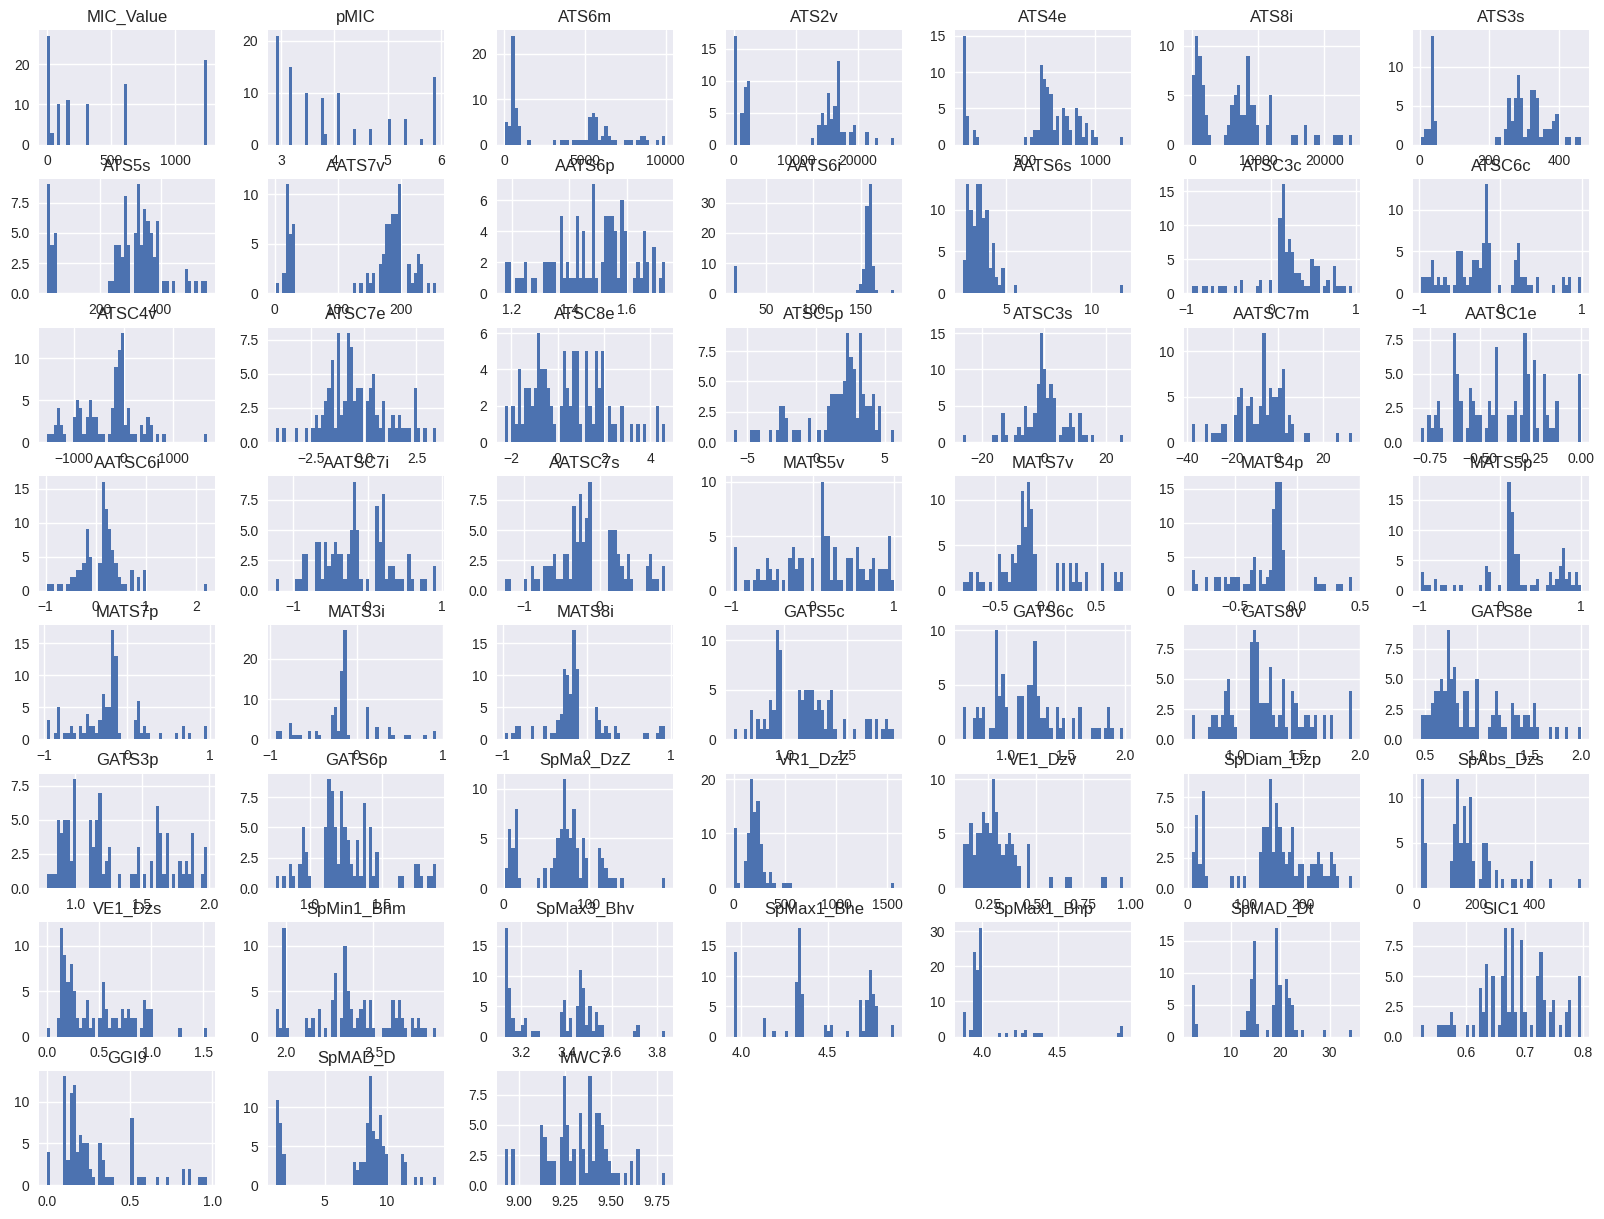

In [ ]:
df2.hist(bins = 50, figsize=(20,15))
plt.show()

**Initiation of HistGradient Boosting Regressor**

In [ ]:
model = HistGradientBoostingRegressor(random_state=seed)

In [ ]:
model.fit(X_train, Y_train)

HistGradientBoostingRegressor(random_state=42)

In [ ]:
Y_train_pred = model.predict(X_train)

In [ ]:
print(Y_train_pred)

[5.21488902 2.94030734 3.55940485 4.06044043 3.10300595 5.1229739
 5.33319917 2.97534386 4.0893762  2.98232957 5.63518405 3.13540984
 4.12279231 3.3306927  3.72334567 2.90783409 2.91959518 3.73585069
 4.1807186  5.66546348 5.00819825 5.25385298 3.06373075 3.82344608
 5.74047377 3.73679511 3.73002983 3.02495566 3.47188715 2.89022401
 5.52869732 4.16752805 3.13364211 5.14518409 5.71688675 2.91060113
 3.7825235  3.13248926 4.07080115 3.58866624 5.46369761 3.09171751
 3.12400506 3.4505954  3.55016566 2.93202483 2.96080052 5.30268165
 5.19516507 5.73483932 4.0911864  3.15749655 2.94162105 2.98025439
 3.08744183 3.81130142 5.71342501 4.37648576 2.95819103 5.84249209
 3.116534   3.1007671  2.92661861 5.20289088 5.7645123  3.81355064
 3.5588863  3.29822247 5.77608444 3.29699382 3.11521219 3.02198923
 3.57142739 3.78134373 4.46033524 5.77815203 3.61897288]


In [ ]:
predictions1 = pd.DataFrame({'Y_train' : Y_train, 'Y_train_pred' : Y_train_pred})

In [ ]:
predictions1

,Y_train,Y_train_pred
49,5.311580,5.214889
70,2.903090,2.940307
68,3.505150,3.559405
15,4.107238,4.060440
39,3.204120,3.103006
...,...,...
60,3.505150,3.571427
71,3.805486,3.781344
14,4.408268,4.460335
92,5.913640,5.778152


In [ ]:
len(Y_train_pred)

77

In [ ]:
print('The training r_sq is: %.4f'% model.score(X_train, Y_train))

The training r_sq is: 0.9858


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_train, Y_train_pred))

The MAE is: 0.0925


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_train, Y_train_pred)))

The RMSE is: 0.1230


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_train, Y_train_pred))

The EVS is: 0.9858


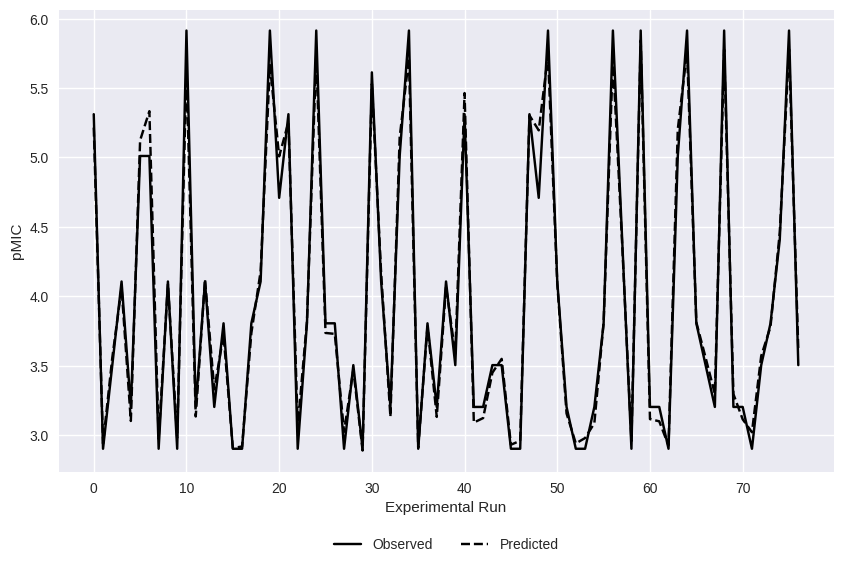

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_train))
plt.plot(x_ax, Y_train, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_train_pred, label = 'Predicted', color = 'k', linestyle = '--')
plt.ylabel('pMIC')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

In [ ]:
Y_test_pred = model.predict(X_test)

In [ ]:
Y_test_pred

array([4.31094342, 5.34410652, 5.69183488, 5.51814935, 3.06407558,
       3.14780801, 3.01839881, 3.56673121, 3.14785297, 5.29316865,
       4.06943305, 3.21935029, 2.86503056, 4.09525008, 4.65162851,
       5.48189276, 3.67146397, 3.69208152, 3.95308114, 5.61862864])

In [ ]:
len(Y_test_pred)

20

In [ ]:
predictions2 = pd.DataFrame({'Y_test' : Y_test, 'Y_test_pred' : Y_test_pred})

In [ ]:
predictions2

,Y_test,Y_test_pred
62,4.107238,4.310943
40,4.709298,5.344107
93,5.913640,5.691835
18,5.913640,5.518149
81,2.903090,3.064076
83,2.903090,3.147808
64,2.903090,3.018399
42,3.505150,3.566731
10,2.903090,3.147853
0,5.311580,5.293169


In [ ]:
print('The testing r_sq is: %.4f'% r2_score(Y_test, Y_test_pred))

The testing r_sq is: 0.9413


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_test, Y_test_pred)))

The RMSE is: 0.2510


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_test, Y_test_pred))

The EVS is: 0.9471


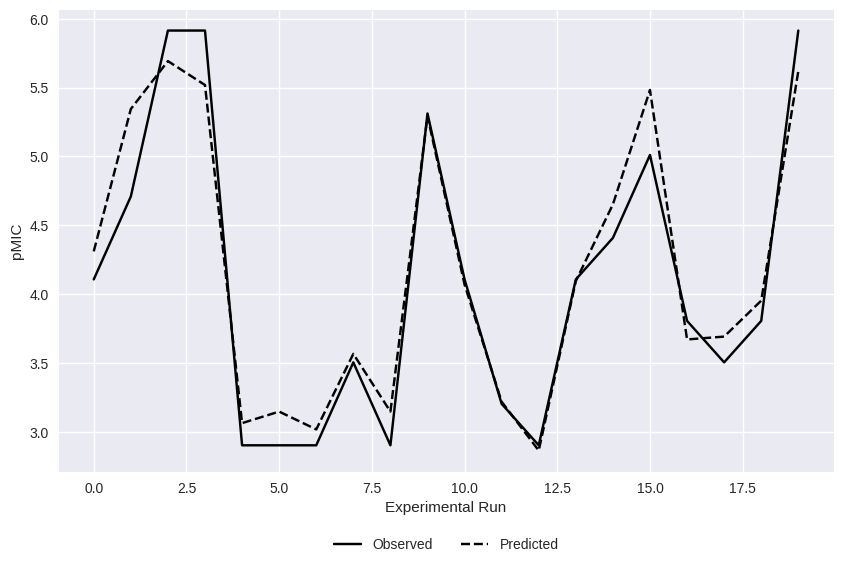

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_test))
plt.plot(x_ax, Y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_test_pred, label = 'Predicted', color = 'k', linestyle = '--')
plt.ylabel('pMIC')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

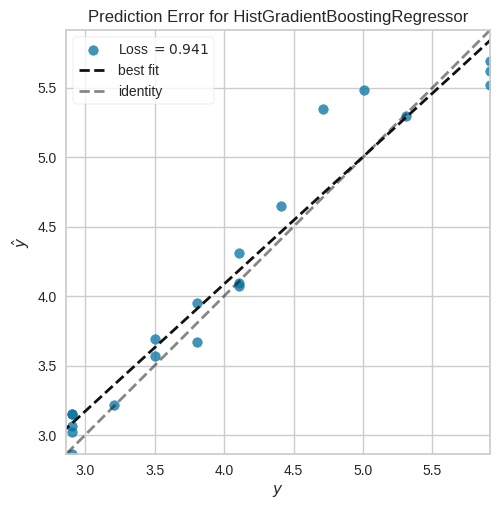

<Axes: title={'center': 'Prediction Error for HistGradientBoostingRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()

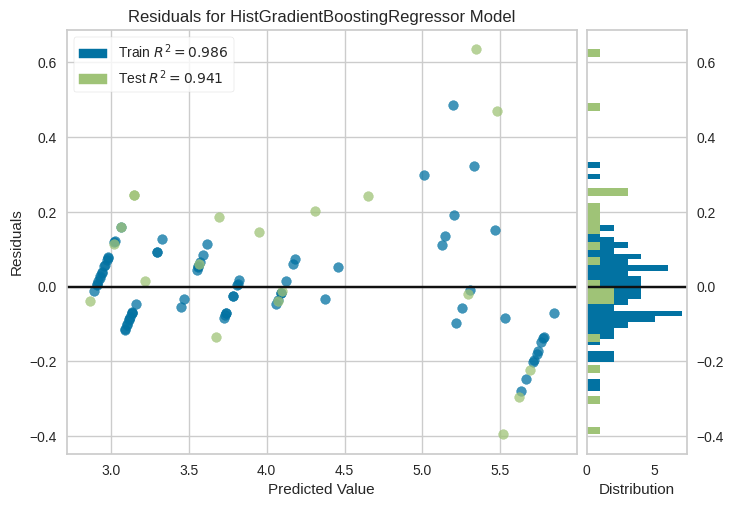

<Axes: title={'center': 'Residuals for HistGradientBoostingRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()

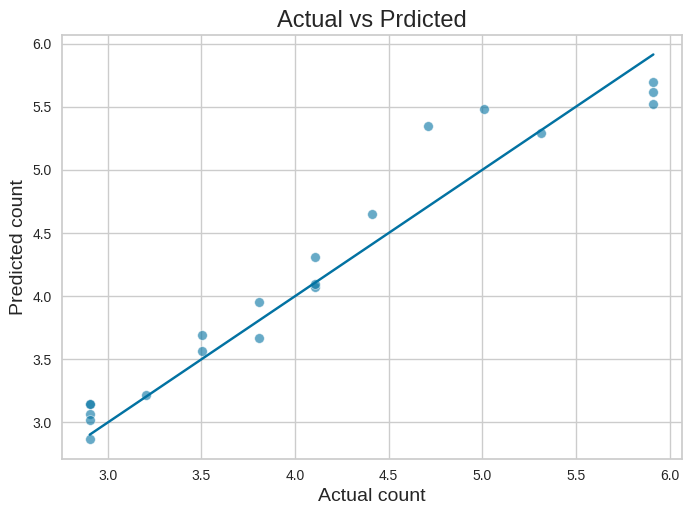

In [ ]:
sns.scatterplot(x=Y_test, y=Y_test_pred, alpha=0.6)
sns.lineplot(x=Y_test, y=Y_test)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Prdicted', fontsize = 17)
plt.show()

In [ ]:
model.score(X_test, Y_test)

0.9413498365175819

In [ ]:
MSE_test = round(np.mean(np.square(Y_test - Y_test_pred)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.24